<a href="https://colab.research.google.com/github/piriram/SummerDeepLearningStudy/blob/main/week2_%EC%97%AD%EC%A0%84%ED%8C%8C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

``` python
안녕하세요. 2주차 과제입니다.

난이도는 다음과 같습니다.
🔥 : 강의 내용, 간단한 파이썬 지식이 필요한 문제
🔥🔥 : 심화 개념, 또는 파이썬 지식 및 파이토치 지식이 필요한 문제
🔥🔥🔥 : 난이도가 높아 상당한 시간이 소요되는 문제

```

In [1]:
# 과제 진행 전에 실행해주세요!

import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

``` python
딥러닝 모델 학습은 다음의 4단계로 요약 가능합니다.
1. 매개변수 θ를 가진 모델을 정의한다.
2. 순전파를 통해 예측값을 구한다.
3. 손실함수를 활용하여 실제 정답값간의 차이를 구한 뒤 역전파를 활용하여 오차를 최소화한다.
4. 모델이 잘 학습되었다고 판단될 때까지 2~3번 과정을 반복한다.

모델을 잘 정의하는 것만큼 원하는 Task를 위한 손실 함수를 정의하는 것도 중요합니다.

이번 과제에서는 간단한 손실함수와 역전파 과정을 직접 구현해보도록 하겠습니다.
```

### 역전파(Backpropagation)


``` python
손실 함수의 최적값을 찾기 위한 알고리즘입니다.
순전파 과정에서 역전파에 필요한 연산 과정을 저장하고, 마지막 층에서부터 연쇄 법칙을 활용해 미분을 진행합니다.

미분을 위해 중간값들을 모두 저장하기 때문에 메모리가 많이 드는 것이 특징입니다.
```
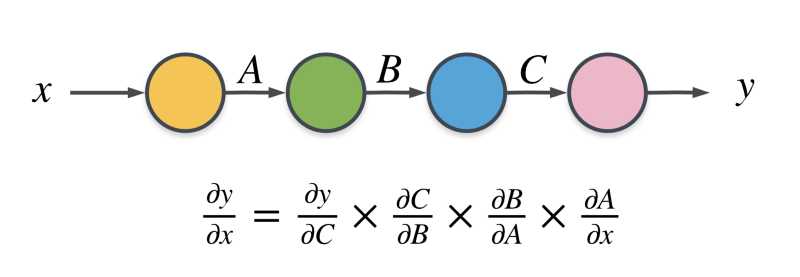

https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/


#### 덧셈과 곱셈🔥🔥

``` python
역전파 알고리즘은 순전파 과정에서 연산 정보를 저장하고, 역전파 과정에서 저장된 값들을 활용하는 방식으로 진행됩니다.

이번에는 가장 간단한 연산인 덧셈, 그리고 곱셈의 역전파 과정을 직접 구현해보겠습니다.

```

  #### 1. $\quad z = x + y$ 일 때,
  ##### $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad z = xy$ 일 때,
  ##### $\frac{\partial z}{\partial x} = y, \frac{\partial z}{\partial y} = x$

In [2]:
# 덧셈을 진행하는 계층을 구현해보겠습니다.

class Add():
  def __init__(self):
    pass

##############TODO##############
  def forward(self, x, y):
    result = x + y
    return result

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy
##############TODO##############

In [3]:
# 곱셈을 진행하는 계층을 구현해보겠습니다.

class Mul():
  def __init__(self):
    pass

##############TODO##############
  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy
##############TODO##############

``` python
구현한 덧셈, 곱셈 계층을 활용하여 수업 시간의 예제를 그대로 재현해보겠습니다.

먼저, 간단한 MSE 함수를 구현해봅시다.
```
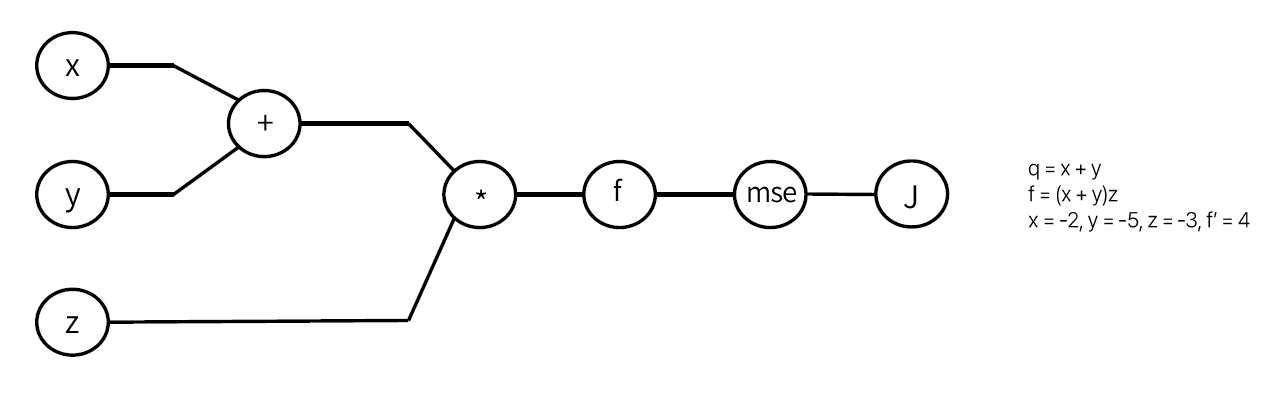

In [4]:
# 곱셈을 진행하는 계층을 구현해보겠습니다.

class MSE():
  def __init__(self):
    pass

##############TODO##############
  def forward(self, pred, ans):  # pred는 예측값, ans는 실제 정답값
    self.pred = pred
    self.ans = ans
    result = 0.5 * ((pred-ans)**2)
    return result

  def backward(self, pred, ans):
    dmse = self.ans - self.pred
    return dmse
##############TODO##############

In [5]:
# 아래 코드는 수정하실 필요가 없습니다!
x = -2
y = 5
z = -3
ans = 4

add_ = Add()
mul_ = Mul()
mse = MSE()

q = add_.forward(x,y)
f = mul_.forward(q,z)
mse_result = mse.forward(f,ans)

print(q, f, mse_result)

dmse = mse.backward(f,ans)
dq, dz = mul_.backward(dmse)
dx, dy = add_.backward(dq)

print(dx, dy, dq, dz, dmse)
answer_list = [dx, dy, dq, dz, dmse]

3 -9 84.5
-39 -39 -39 39 13


##### 정답 확인

In [6]:
if answer_list == [-39, -39, -39, 39, 13]:
    print("🎉🎉🎉 성공입니다!!! 🎉🎉🎉")
else:
    print("🔥다시 도전해봅시다!🔥")

🎉🎉🎉 성공입니다!!! 🎉🎉🎉


#### 활성화 함수 역전파🔥🔥

``` python
활성화 함수를 거칠 때도 마찬가지로 역전파를 진행합니다.

아래의 ReLU 함수 예제를 참고해서 구현해주세요!
0 이하인 값을 저장하는 self.mask를 정의하여 활용해봅시다.
```

  ##### $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ##### $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [7]:
# ReLU 연산을 진행하는 계층을 구현해보겠습니다.

class ReLU():
  def __init__(self):
    self.mask = None

##############TODO##############
  def forward(self, x):
    self.mask = (x <= 0)
    result = x.copy()
    result[self.mask] = 0
    return result

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx
##############TODO##############

In [8]:
# 아래 코드는 수정하실 필요가 없습니다!
a = np.array([-1, 3, 0, 7])
dout = np.array([3, 0, 5, -8])

relu = ReLU()

result = relu.forward(a)
back_result = relu.backward(dout)

##### 정답 확인

In [9]:
if (result == [0, 3, 0, 7]).all() and (back_result == [0, 0, 0, -8]).all():
    print("🎉🎉🎉 성공입니다!!! 🎉🎉🎉")
else:
    print("🔥다시 도전해봅시다!🔥")

🎉🎉🎉 성공입니다!!! 🎉🎉🎉


####  $Y = X \bullet W + B$ 역전파🔥🔥🔥
``` python
가장 기본적인 완전 연결 계층(Fully Connected Layer, Affine Layer)을 이루는 구성입니다.
이전 예시들과는 달리, 여러 데이터들이 모여 행렬의 형태를 하고 있는 것이 특징입니다.
연산 과정 중에 행렬 내적이 있어, 구현시 이 부분을 유의해야 합니다.

아래의 예제를 참고해서 구현해주세요!
행렬 내적의 역전파와 관련된 설명은 아래 링크를 참고해주세요.
```
$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T $

$\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} $

https://math.stackexchange.com/questions/2655707/computing-the-derivative-of-a-matrix-vector-dot-product

In [10]:
# Affine 계층 연산을 진행하는 계층을 구현해보겠습니다.

class Affine():
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

##############TODO##############
  def forward(self, x):
    self.x = x
    result = np.dot(x, self.W) + self.b
    return result

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)  # W.T는 가중치 행렬의 전치 행렬을 의미합니다.
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx
##############TODO##############

In [11]:
# 아래 코드는 수정하실 필요가 없습니다! 연산 과정을 이해해봅시다!
X = np.random.rand(1,2)
W = np.random.rand(2,3)
b = np.random.rand(3)
dout = np.random.rand(1,3)

affine = Affine(W, b)

affine_result = affine.forward(X)
back_affine_result = affine.backward(dout)

##### 정답 확인

In [12]:
if (affine_result == np.dot(X,W) + b).all() and (back_affine_result == np.dot(dout, W.T)).all():
    print("🎉🎉🎉 성공입니다!!! 🎉🎉🎉")
else:
    print("🔥다시 도전해봅시다!🔥")

🎉🎉🎉 성공입니다!!! 🎉🎉🎉
